In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Default plotting parameters
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 1

mlp.rcParams['xtick.major.size'] = 15
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 15
mlp.rcParams['xtick.color'] = '#4DFC2D'

mlp.rcParams['ytick.major.size'] = 15
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 15
mlp.rcParams['ytick.color'] = '#4DFC2D'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#ED6919'
mlp.rcParams['axes.labelcolor'] = '#ED6919'

In [4]:
data = pd.read_excel('data.xlsx')

data.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [5]:
data.status.value_counts()

ОПЛАЧЕНО         622
ПРОСРОЧЕНО        52
В РАБОТЕ          44
НА ПОДПИСАНИИ      5
Май 2021           1
ВНУТРЕННИЙ         1
Июнь 2021          1
Июль 2021          1
Август 2021        1
Сентябрь 2021      1
Октябрь 2021       1
Name: status, dtype: int64

In [9]:
data.isna().sum()

client_id           6
sum                 6
status              0
sale                6
new/current         6
Unnamed: 5        730
document           21
receiving_date    123
dtype: int64

In [56]:
data = data.drop('Unnamed: 5', axis=1) # drop column with no values

data = data[(data.receiving_date != '-') & (~data.receiving_date.isna())] # rows with no date
data.receiving_date = pd.to_datetime(data.receiving_date)

data.head()

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15


In [89]:
data.describe(include=object)

,status,sale,new/current,document
count,606,606,606,595
unique,3,10,2,1
top,ОПЛАЧЕНО,Петрова,текущая,оригинал
freq,569,139,537,595


Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен

In [57]:
df = data[
    (data.receiving_date.dt.year == 2021) & (data.receiving_date.dt.month == 7)
    & (data.status != 'ПРОСРОЧЕНО')
]

df.head()

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.70,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
5,18.0,4253.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
6,20.0,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15
12,32.0,7353.90,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09
13,34.0,3892.52,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09


In [12]:
print('Общая выручка:', df['sum'].sum())

Общая выручка: 757830.7399999996


Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

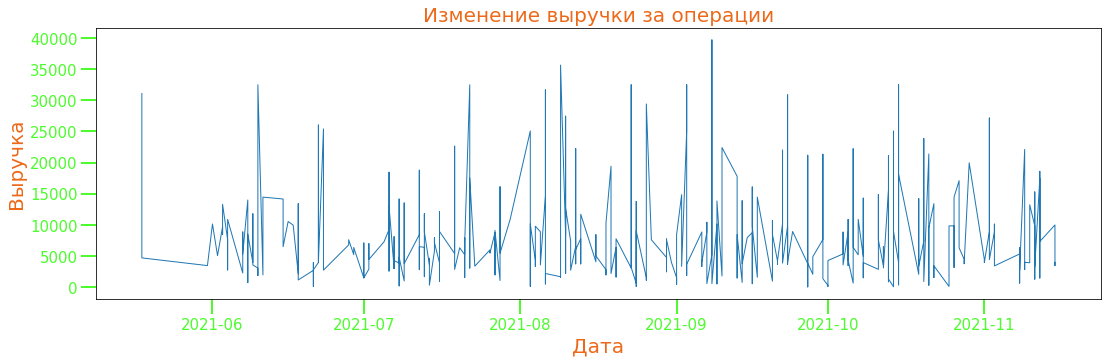

In [13]:
plt.figure(figsize=(18, 5))

df = data.sort_values(by='receiving_date')

plt.plot(df.receiving_date, df['sum'])

plt.title('Изменение выручки за операции')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [58]:
df = data[
    (data.receiving_date.dt.year == 2021) & (data.receiving_date.dt.month == 9)
]

result = df.groupby('sale').agg({'sum': 'sum'}).reset_index()

result[result['sum'] == result['sum'].max()]

,sale,sum
4,Петрова,219240.12


Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [59]:
data['new/current'].unique()

array(['новая', 'текущая'], dtype=object)

In [60]:
data.head(1)

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26


In [17]:
df = data[
    (data.receiving_date.dt.year == 2021) & (data.receiving_date.dt.month == 10)
]

df_new = df[df['new/current'] == 'новая'].drop_duplicates()
df_curr = df[df['new/current'] == 'текущая'].drop_duplicates()

print('Новая' if df_new.shape[0] >= df_curr.shape[0] else 'Текущая')

Текущая


Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [18]:
data.status.unique()

array(['ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'В РАБОТЕ'], dtype=object)

In [19]:
df = data[
    (data.status == 'Май 2021') & (data.document == 'оригинал')
    & (data.receiving_date.dt.year == 2021) & (data.receiving_date.dt.month == 6)
]

# Тут решение не имеет смысла, так как уже дропнули сделки со статусом Май
df.drop_duplicates().shape[0] 

0

 - За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.

 - За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).

 - За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

 - Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по
мере прихода оригиналов.

*Вычислите остаток каждого из менеджеров на 01.07.2021.*

In [85]:
df.document.unique()

array(['оригинал', nan], dtype=object)

In [38]:
df = data[data.receiving_date < '2021-07-01'].copy()

df.head(1)

,client_id,sum,status,sale,new/current,document,receiving_date
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08


In [83]:
def calculate_remainings(data) -> np.array:
    result = []

    for i in range(data.shape[0]):
        row = data.iloc[i]
        if row['new/current'] == 'новая' and row['status'] == 'ОПЛАЧЕНО' \
                and row['document'] == 'оригинал':
            result.append(0.07 * row['sum'])
            
        if row['new/current'] == 'текущая' and row['status'] != 'ПРОСРОЧЕНО' \
                and row['document'] == 'оригинал':
                result.append(row['sum'] * (0.05 if row['sum'] > 10000 else 0.03))
        if len(result) <= i:
            result.append(0)
        
    return np.array(result)

In [84]:
df['bonus'] = calculate_remainings(df)

df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,bonus
21,46.0,4945.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23,148.371
22,47.0,4449.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23,133.491
23,49.0,7203.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23,216.111
29,59.0,3938.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23,118.161
133,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-09-09,89.901


In [87]:
df.groupby('sale').bonus.sum()

sale
Андреев       6415.7305
Васильев      2859.6990
Иванов        7292.4940
Кузнецова     2948.6460
Петрова       8141.2026
Смирнов       6993.5610
Соколов       1540.3120
Филимонова    1108.1880
Name: bonus, dtype: float64